# Review 1

This review contains some representative problems to prepare for the first midterm exam.

## question 1

Consider $S = \sqrt{2}$

1. Construct a nearby rational approximation for $S$ where the size of the denominator is not larger than 1000.

2. Construct a sequence of 10 nearby rational approximations, where the denominator of the $k$-th approximation is smaller than $10^k$.

3. Verify the accuracy of the rational approximations.

## question 2

Define a function ``whatis`` which stores definitions.

Here is a session with this function:

1. ``whatis('computer algebra')`` returns

   ``call again with the definition for computer algebra``
   
   
2. ``whatis('computer algebra', 'the study of algorithms in symbolic computation')`` 

   stores the definition for ``'computer algebra'``
   
   
3. ``whatis('computer algebra')`` returns

   ``the study of algorithms in symbolic computation``

## question 3

Consider the polynomial $p = x^4 + x^2 + 1$
over the field ${\mathbb Z}_2$, the field of bits, 0 and 1.
   
   1. Is $p$ irreducible?  If not, then what are its factors?
   
   2. Extend the field ${\mathbb Z}_2$ with sufficiently many formal roots
      so $p$ factors as a product of linear factors.
      
      Write the factorization of $p$.

## question 4

Write a Python function ``python_sum`` which takes on input a positive integer $n$ and which returns
the floating-point value of

$$
    \frac{\pi}{n} \sum_{i=1}^{n-1} \cos\left( - \frac{\pi}{2} + i \frac{\pi}{n} \right).
$$

Write a more efficient version ``numpy_sum`` using vectorization.

Time the two versions to illustrate the efficiency.

## question 5

Explain what is the fully factored normal form of rational polynomials.

Why does this automatic simplification not happen automatically?

Illustrate with a good example.

## question 6

Type 
``reset(); x, y = var('x,y'); q = (x^2 - y)/(y^2 - x)``
and draw the expression tree of ``q.``

## question 7

Rewrite

$$
   x + \frac{(x - y)^5}{(x + y)^5}
$$

into

$$
   \frac{(x + y)^5 \cdot x + (x - y)^5}{(x + y)^5}.
$$

## question 8

Consider $p = -y^2 z^3 - y z^4 + 3 x y^3 + x^3 + z^2$
as a polynomial with integer coefficients in the variables $x$, $y$, and $z$.
   
The monomials of $p$ are sorted in the degree lexicographical order.
   
Convert $p$ (*without retyping $p$!*) into the pure lexicographical term order.

# Review 1 - Answers separated

## 1. nearby rational approximations

Consider $S = \sqrt{2}$

1. Construct a nearby rational approximation for $S$ where the size of the denominator is not larger than 1000.

2. Construct a sequence of 10 nearby rational approximations, where the denominator of the $k$-th approximation is smaller than $10^k$.

3. Verify the accuracy of the rational approximations.

In [ ]:
S = sqrt(2)

In [ ]:
q = RR(S).nearby_rational(max_denominator=1000)
q

1393/985

In [ ]:
R100 = RealField(prec=100)

In [ ]:
Q = [R100(S).nearby_rational(max_denominator=10^k) for k in range(1,11)]
Q

[7/5,
 140/99,
 1393/985,
 8119/5741,
 114243/80782,
 941664/665857,
 9369319/6625109,
 131836323/93222358,
 1086679440/768398401,
 10812186007/7645370045]

In [ ]:
[floor(abs(log(abs(S - q)/abs(S), 10.0))) for q in Q]

[1, 4, 6, 8, 10, 11, 14, 16, 18, 20]

Observe the increase in precision from ``RR`` (default 53 bits) to 100 bits in ``R100``.

## 2. a function to store data

Define a function ``whatis`` which stores definitions.

Here is a session with this function:

1. ``whatis('computer algebra')`` returns

   ``call again with the definition for computer algebra``
   
   
2. ``whatis('computer algebra', 'the study of algorithms in symbolic computation')`` 

   stores the definition for ``'computer algebra'``
   
   
3. ``whatis('computer algebra')`` returns

   ``the study of algorithms in symbolic computation``

In [ ]:
def whatis(name, *definition, D={}):
    if name in D:
        print(name,'is', D[name])
    else:
        if(len(definition) > 0):
            D[name] = definition[0]
        else:
            print('call again with the definition for', name)

In [ ]:
whatis('computer algebra')

call again with the definition for computer algebra


In [ ]:
whatis('computer algebra', 'the study of algorithms in symbolic computation')

In [ ]:
whatis('computer algebra')

computer algebra is the study of algorithms in symbolic computation


In [ ]:
whatis('symbolic computation')

call again with the definition for symbolic computation


Using this function could be a good preparation to study the definitions we encountered in the course.

## 3. Algebraic Numbers

Consider the polynomial $p = x^4 + x^2 + 1$
over the field ${\mathbb Z}_2$, the field of bits, 0 and 1.
   
   1. Is $p$ irreducible?  If not, then what are its factors?
   
   2. Extend the field ${\mathbb Z}_2$ with sufficiently many formal roots
      so $p$ factors as a product of linear factors.
      
      Write the factorization of $p$.

In [ ]:
reset()
x = polygen(GF(2))
p = x^4 + x^2 + 1
print('Is', p, 'irreducible?', p.is_irreducible())

Is x^4 + x^2 + 1 irreducible? False


The polynomial is not irreducible, it factors.

In [ ]:
factor(p)

(x^2 + x + 1)^2

We see that the polynomial is the square of $x^2 + x + 1$.

To define the field extension, we select the irreducible factor from the list of factors.

In [ ]:
L = list(factor(p))
L

[(x^2 + x + 1, 2)]

In [ ]:
f = L[0][0]
K.<r> = GF(2).extension(f)
K

Finite Field in r of size 2^2

To see the factorization, we must cast the polynomial into the polynomial ring over this extended field.

In [ ]:
factor(K[x](p))

(x + r)^2 * (x + r + 1)^2

## 4. Vectorization

Write a Python function ``python_sum`` which takes on input a positive integer $n$ and which returns
the floating-point value of

$$
    \frac{\pi}{n} \sum_{i=1}^{n-1} \cos\left( - \frac{\pi}{2} + i \frac{\pi}{n} \right).
$$

Write a more efficient version ``numpy_sum`` using vectorization.

Time the two versions to illustrate the efficiency.

In [ ]:
def python_sum(n):
    """
    Returns the sum of cos(-pi/2 + i*(pi/n)) for i from 1 to n-1.
    """
    return float((pi/n)*sum([cos(-pi/2 + i*(pi/n)) for i in range(1,n)]))

In [ ]:
python_sum(1000)

1.9999983550656617

To prepare the ``numpy`` version, let us experiment with ``arange`` for ``n`` equal to 10.

In [ ]:
from numpy import arange

In [ ]:
arange(10)*(pi/10) - pi/2

array([-1/2*pi, -2/5*pi, -3/10*pi, -1/5*pi, -1/10*pi, 0, 1/10*pi, 1/5*pi,
       3/10*pi, 2/5*pi], dtype=object)

In [ ]:
def numpy_sum(n):
    """
    Applies numpy vectors to sum cos(-pi/2 + i*(pi/n)) for i from 1 to n-1.
    """
    from numpy import arange, cos, pi
    x = arange(n-1)*(pi/n) - pi/2
    c = cos(x)
    return (pi/n)*sum(c)

In [ ]:
numpy_sum(1000)

1.9999884854774963

In [ ]:
timeit('python_sum(1000)')

25 loops, best of 3: 21.2 ms per loop

In [ ]:
timeit('numpy_sum(1000)')

625 loops, best of 3: 10.4 μs per loop

We see an enormous speed up, from 72 milliseconds to 31 microseconds.

## 5. Fully Factored Form of Rational Polynomials

Explain what is the fully factored normal form of rational polynomials.

Why does this automatic simplification not happen automatically?

Illustrate with a good example.

### answer:

The fully factored normal form of the rational polynomial is where both numerator and denominator are factored and where the common factor is removed.

In [ ]:
reset()
x = var('x')
q = (x^2 - 1)/(x+1)
show(q)

(x^2 - 1)/(x + 1)

In [ ]:
print('normalized numerator :', q.numerator(normalize=True))
print('normalized denominator :', q.denominator(normalize=True))

normalized numerator : x - 1
normalized denominator : 1


Because of expression swell, this normalization does not happen automatically.  An example is

$$
   \frac{x^{1000} - 1}{x - 1}
$$

which leads to 1000 terms if the $x-1$ is factored out of the numerator.

## 6. Expression Trees

Type 
``reset(); x, y = var('x,y'); q = (x^2 - y)/(y^2 - x)``
and draw the expression tree of ``q.``

In [ ]:
reset()
x, y = var('x, y')
q = (x^2 - y)/(y^2 - x)

Let us ask for the operands and the operators.

In [ ]:
L0 = q.operands()
print(q.operator(), 'operates on', L0) 
L1 = [(a.operands(), a.operator()) for a in L0]
L1

<function mul_vararg at 0x7f4f37c9aef0> operates on [x^2 - y, 1/(y^2 - x)]


[([x^2, -y], <function add_vararg at 0x7f4f37c9ae60>),
 ([y^2 - x, -1], <built-in function pow>)]

Observe that the division by ``(y^2 - x)`` is represented by ``(y^2 - x)^(-1)``.

We continue computing the operators and the operands.

In [ ]:
L2 = L1[0][0]
L3 = L1[1][0]
L4 = [(a.operands(), a.operator()) for a in L2]
L5 = [(a.operands(), a.operator()) for a in L3]
print(L4)
print(L5)

[([x, 2], <built-in function pow>), ([y, -1], <function mul_vararg at 0x7f4f37c9aef0>)]
[([y^2, -x], <function add_vararg at 0x7f4f37c9ae60>), ([], None)]


There are two expressions, ``y^2`` and ``-x``, which have operands and an operator.

In [ ]:
L6 = L5[0][0]
[(a.operands(), a.operator()) for a in L6]

[([y, 2], <built-in function pow>),
 ([x, -1], <function mul_vararg at 0x7f4f37c9aef0>)]

Now we represent ``y^2`` and ``-x`` with ``LabelledOrderedTree`` objects.

The next line is needed only if you are running WSL.

In [ ]:
sage.typeset.ascii_art.AsciiArt._terminal_width = lambda x: 80

In [ ]:
leafy = LabelledOrderedTree([], label='y')
leaf2 = LabelledOrderedTree([], label='2')
nodey2 = LabelledOrderedTree([leafy, leaf2], label='^')
leafx = LabelledOrderedTree([], label='x')
leafm1 = LabelledOrderedTree([], label='-1')
nodexm1 = LabelledOrderedTree([leafx, leafm1], label='*')
print(ascii_art(nodey2))
print(ascii_art(nodexm1))

  ^_
 / /
y 2
  *_
 / / 
x -1


In the same fashion, we represent ``x^2`` and ``-y``.

In [ ]:
nodex2 = LabelledOrderedTree([leafx, leaf2], label='^')
nodeym1 = LabelledOrderedTree([leafy, leafm1], label='*')
print(ascii_art(nodex2))
print(ascii_art(nodeym1))

  ^_
 / /
x 2
  *_
 / / 
y -1


The numerator is ``x^2 - y`` and the denominator ``y^2 - x``.

In [ ]:
numerator = LabelledOrderedTree([nodex2, nodeym1], label='+')
denominator = LabelledOrderedTree([nodey2, nodexm1], label='+')
print(ascii_art(numerator))
print(ascii_art(denominator))

    _+___
   /    /  
  ^_   *_
 / /  / / 
x 2  y -1
    _+___
   /    /  
  ^_   *_
 / /  / / 
y 2  x -1


Then at last, we take the inverse of the denominator
and multiply with the numerator.

In [ ]:
invden = LabelledOrderedTree([denominator, leafm1], label='^')
exptree = LabelledOrderedTree([numerator, invden], label="*")
ascii_art(exptree)

       _______*________
      /               /     
    _+___          __^____
   /    /         /      / 
  ^_   *_       _+___   -1
 / /  / /      /    /  
x 2  y -1     ^_   *_  
             / /  / /  
            y 2  x -1  

## 7. Manipulation of Expressions

Rewrite

$$
   x + \frac{(x - y)^5}{(x + y)^5}
$$

into

$$
   \frac{(x + y)^5 \cdot x + (x - y)^5}{(x + y)^5}.
$$

In [ ]:
reset()
x, y = var('x, y')
p = x + (x-y)^5/(x+y)^5
show(p)

x + (x - y)^5/(x + y)^5

We need to prevent ``x+y`` and ``x-y`` from expanding.  We will replace ``x+y`` and ``x-y`` by two new variables, which we must declare first.

In [ ]:
u, v = var('u, v')
q = p.subs({x+y:u, x-y:v})
show(q)

x + v^5/u^5

In [ ]:
f = factor(q)
show(f)

(u^5*x + v^5)/u^5

In [ ]:
show(f(u=x+y,v=x-y))

((x + y)^5*x + (x - y)^5)/(x + y)^5

## 8. Multivariate Polynomials

Consider $p = -y^2 z^3 - y z^4 + 3 x y^3 + x^3 + z^2$
as a polynomial with integer coefficients in the variables $x$, $y$, and $z$.
   
The monomials of $p$ are sorted in the degree lexicographical order.
   
Convert $p$ (*without retyping $p$!*) into the pure lexicographical term order.

In [ ]:
reset()
R.<x,y,z> = PolynomialRing(ZZ)
p = -y^2*z^3 - y*z^4 + 3*x*y^3 + x^3 + z^2
show(p)

-y^2*z^3 - y*z^4 + 3*x*y^3 + x^3 + z^2

In [ ]:
Rlex.<x,y,z> = PolynomialRing(ZZ, order='lex')
q = Rlex(p)
show(q)

x^3 + 3*x*y^3 - y^2*z^3 - y*z^4 + z^2

# Review 2

In this review sheet we consider problems
to prepare for the second midterm exam of mcs 320.

> Question 1

Count the number of points with integer coordinates $(x,y)$
in the region defined by the inequalities $0 \leq x < 20$, $0 \leq y < 20$,
$y \geq x/2$, $y \leq 3 x$.

Do the following:

1. Generate a list L of integer points $(i,j)$ for $i$ and $j$ ranging between 0 and 19.

2. Select from the list L those points in the cone $y \geq x/2$ and by $y \leq 3 x$.

3. Count the number of points in the cone.  Write also the number below.

> Question 2

For some parameter $t$, consider the sequence recursively defined as:

$F(n) = (1-t) F(n-1) + t F(n-2)$, for $n > 1$, where $F(0) = a$ and $F(1) = b$.
   
Using the recursive definition write an efficient SageMath function $F$
to compute $F(n)$ as $F(a,b,t,n)$.
What is the result of $F(a,b,0.3,100)$?

> Question 3

Consider the function $f(t)$ as the integral of $(1 - e^x)$ for $x$ from 0 to $t$, for $t \geq 0$.  

1. Define this function in Sage.
   
2. What is $f'(1)$?

> Question 4

The function $g(x,t) = (1-t^2)/(1 - 2xt + t^2)$ is a
generating function for the Chebyshev polynomials.

1. Compute a Taylor series approximation for $g(x,t)$
   around $t = 0$ of order 10.  
       
2. Select the coefficient of $t^8$ and compare
   with the output of ``chebyshev_T(8,x)``.
       
   Is there a difference between the two?

> Question 5

Consider the point $(1,1)$ on the curve $f(x,y) = x^2 - y^3 - x + y = 0$.

1. Give the Sage command(s) to compute a Taylor series about the point $(1,1)$
   where the term of the error is of second order.

2. Compute the slope of the tangent line of the curve at the point $(1,1)$
   and use the slope to determine the tangent line.
   Write the equation of the tangent line.
   
   Verify that the tangent line equals the first-order Taylor series at $(1,1)$.

> Question 6

Consider the curve $x^4 - 3 x y + y^4 = 0$.  Do the following.

1. Make a plot for $x$ and $y$ both ranging between $-2$ and $+2$;

2. Convert the curve into polar coordinates; and

3. Plot the curve in polar coordinates.

> Question 7

Let $a$ and $b$ be positive numbers.
Consider $f = x^2/a + y/b$ and the unit circle $x^2 + y^2 = 1$.
    
Determine the number of candidate extremal values of $f$ on the unit circle.
   
Use a lexicographic Groebner basis to compute a triangular form of the equations for this problem.

> Question 8

Do the following.

1. Create a 5-by-5 matrix $A$ over the rationals where 
   the $(i,j)$-the element is $1/(i+j)$ (for $i$ and $j$ both from 1 to 5).

2. Define $b$ as a vector of length 5 of ones.
   Solve the system defined by $A x = b$.
   
3. Verify that $b - A x$ equals zero.

> Question 9

Consider the intial value problem $dy/dt = 2 - 6y$, $y(0) = -1$.

1. Solve this problem and plot the solution trajectory for $t \in [0,2]$.
    
2. Plot the slope field for $t \in [0,2]$, $y \in [-1,0.5]$.
  
   Place also the particular solution computed the first part of this question on the plot.

> Question 10

Minimize $x+3y$ 

subject to $x \geq 2$, $y \geq 1$, $x + 2y \leq 8$, $x+y \leq 6$.
    
Formulate the linear programming problem and solve it.

# Review 2 - Answers separated

## 1. List Comprehensions

Count the number of points with integer coordinates $(x,y)$
in the region defined by the inequalities $0 \leq x < 20$, $0 \leq y < 20$,
$y \geq x/2$, $y \leq 3 x$.

Do the following:

1. Generate a list L of integer points $(i,j)$ for $i$ and $j$ ranging between 0 and 19.

2. Select from the list L those points in the cone $y \geq x/2$ and by $y \leq 3 x$.

3. Count the number of points in the cone.  Write also the number below.

In [ ]:
reset()

In [ ]:
L = [(i,j) for i in range(20) for j in range(20)]
F = [(x,y) for (x,y) in L if (y >= x/2 and y <= 3*x)]
F

[(0, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (6, 18),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 17),
 (7, 18),
 (7, 19),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (8, 16),
 (8, 17),
 (8, 18),
 (8, 19),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 15),
 (9, 16),
 (9, 17),
 (9, 18),
 (9, 19),
 (10, 5

In [ ]:
len(F)

230

We count 230 points.

## 2. Memoization

For some parameter $t$, consider the sequence recursively defined as:

$F(n) = (1-t) F(n-1) + t F(n-2)$, for $n > 1$, where $F(0) = a$ and $F(1) = b$.
   
Using the recursive definition write an efficient SageMath function $F$
to compute $F(n)$ as $F(a,b,t,n)$.
What is the result of $F(a,b,0.3,100)$?

In [ ]:
reset()

In [ ]:
def f(a, b, t, n):
    """
    Withouth memoization ...
    """
    if n == 0:
        result = a
    elif n == 1:
        result = b
    else:
        result = (1-t)*f(a,b,t,n-1) + t*f(a,b,t,n-2)
    return result

In [ ]:
A, B = var('A, B')
f(A, B, 0.3, 0)

A

In [ ]:
f(A, B, 0.3, 1)

B

In [ ]:
f(A, B, 0.3, 2)

0.300000000000000*A + 0.700000000000000*B

In [ ]:
def F(a, b, t, n, D={}):
    """
    Memoized F with D.
    """
    if (a,b,t,n) in D:
        return D[(a,b,t,n)]
    else:
        if n == 0:
            result = a
        elif n == 1:
            result = b
        else:
            result = (1-t)*F(a,b,t,n-1) + t*F(a,b,t,n-2)
        D[(a,b,t,n)] = result
        return result

We first test some base cases.

In [ ]:
a, b = var('a, b')
print(F(a,b,0.3,0))
print(F(a,b,0.3,1))
print(F(a,b,0.3,2))

a
b
0.300000000000000*a + 0.700000000000000*b


In [ ]:
F(a,b,0.3,100)

0.230769230769230*a + 0.769230769230768*b

## 3. Functions defined by Integrals

Consider the function $f(t)$ as the integral of $(1 - e^x)$ for $x$ from 0 to $t$, for $t \geq 0$.  

1. Define this function in Sage.
   
2. What is $f'(1)$?

In [ ]:
reset()

In [ ]:
f(t) = integral( 1 - exp(x), (x, 0, t))
f

t |--> t - e^t + 1

In [ ]:
df = diff(f,t)
df

t |--> -e^t + 1

In [ ]:
df(t=1)

-e + 1

## 4. Taylor Series

The function $g(x,t) = (1-t^2)/(1 - 2xt + t^2)$ is a
generating function for the Chebyshev polynomials.

1. Compute a Taylor series approximation for $g(x,t)$
   around $t = 0$ of order 10.  
       
2. Select the coefficient of $t^8$ and compare
   with the output of ``chebyshev_T(8,x)``.
       
   Is there a difference between the two?

In [ ]:
reset()

In [ ]:
x, t = var('x,t')
g = (1-t^2)/(1-2*x*t + t^2)
tg = taylor(g,t,0,10)
tg

2*(512*x^10 - 1280*x^8 + 1120*x^6 - 400*x^4 + 50*x^2 - 1)*t^10 + 2*(256*x^9 - 576*x^7 + 432*x^5 - 120*x^3 + 9*x)*t^9 + 2*(128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1)*t^8 + 2*(64*x^7 - 112*x^5 + 56*x^3 - 7*x)*t^7 + 2*(32*x^6 - 48*x^4 + 18*x^2 - 1)*t^6 + 2*(16*x^5 - 20*x^3 + 5*x)*t^5 + 2*(8*x^4 - 8*x^2 + 1)*t^4 + 2*(4*x^3 - 3*x)*t^3 + 2*(2*x^2 - 1)*t^2 + 2*t*x + 1

In [ ]:
tg.coefficient(t,8)

256*x^8 - 512*x^6 + 320*x^4 - 64*x^2 + 2

In [ ]:
chebyshev_T(8,x)

128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1

We see that the difference is a factor of 2: the ``tg.coefficient(t, 8)`` is twice of ``chebyshev_T(8,x)``.

## 5. Slope of the Tangent Line

Consider the point $(1,1)$ on the curve $f(x,y) = x^2 - y^3 - x + y = 0$.

1. Give the Sage command(s) to compute a Taylor series about the point $(1,1)$
   where the term of the error is of second order.

2. Compute the slope of the tangent line of the curve at the point $(1,1)$
   and use the slope to determine the tangent line.
   Write the equation of the tangent line.
   
   Verify that the tangent line equals the first-order Taylor series at $(1,1)$.

In [ ]:
reset()

In [ ]:
x, y = var('x,y')
f = x^2 - y^3 - x + y
tf = taylor(f, (x, 1), (y, 1), 1)
tf

x - 2*y + 1

We can compute the slope of the tangent line directly from the Taylor series, as below.

In [ ]:
-tf.coefficient(x, 1)/tf.coefficient(y, 1)

1/2

To compute the slope of the tangent line at $(1,1)$ we apply implicit differentiation.

In [ ]:
y = function('y')(x)
dy = diff(y,x)
dy

diff(y(x), x)

In [ ]:
g = f.subs(y=y)
g

-y(x)^3 + x^2 - x + y(x)

In [ ]:
df = diff(g,x)
df

-3*y(x)^2*diff(y(x), x) + 2*x + diff(y(x), x) - 1

In [ ]:
s = solve(df, dy)
s

[diff(y(x), x) == (2*x - 1)/(3*y(x)^2 - 1)]

In [ ]:
slope = s[0].rhs().subs(x = 1)
slope = slope.subs({y(x=1):1})
slope

1/2

In [ ]:
tangent = (y-1) - slope*(x-1) == 0
tangent

-1/2*x + y(x) - 1/2 == 0

Let us compare with the Taylor series approximation in ``tf``.

In [ ]:
tf

x - 2*y + 1

In [ ]:
# -tf.coefficient(x, 1)/tf.coefficient(y, 1)
# does not work at this point, because y was defined as a function ...

As equations ``tangent`` and ``tf`` are the same, as can be seen by multiplying the coefficients of ``tangent`` by two.

## 6. Plotting in Polar Coordinates

Consider the curve $x^4 - 3 x y + y^4 = 0$.  Do the following.

1. Make a plot for $x$ and $y$ both ranging between $-2$ and $+2$;

2. Convert the curve into polar coordinates; and

3. Plot the curve in polar coordinates.

In [ ]:
reset()

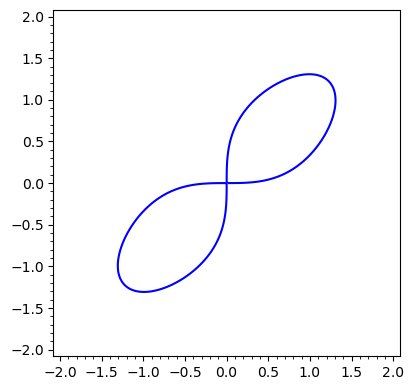

In [ ]:
x,y = var('x,y')
f = x^4 - 3*x*y + y^4
pf = implicit_plot(f, (x, -2, 2), (y, -2, 2))
pf.show()

We convert to polar coordinates with a substitution.

In [ ]:
r, t = var('r,t')

In [ ]:
qf = f(x = r*cos(t), y = r*sin(t))
qf

r^4*cos(t)^4 + r^4*sin(t)^4 - 3*r^2*cos(t)*sin(t)

In [ ]:
rf = solve(qf,r,solution_dict=True)
rf

[{r: -sqrt(3)*sqrt(cos(t)*sin(t)/(cos(t)^4 + sin(t)^4))},
 {r: sqrt(3)*sqrt(cos(t)*sin(t)/(cos(t)^4 + sin(t)^4))},
 {r: 0}]

The problem is to select a good range for $t$,
because ``cos(t)*sin(t)`` appears as argument of ``sqrt``.
To see where ``cos(t)*sin(t)`` becomes negative, we make a plot.

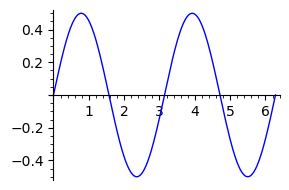

In [ ]:
plot(cos(t)*sin(t), (t, 0, 2*pi), figsize=3)

We select the intervals $[0, \pi/2]$ and $[\pi, 3\pi/2]$.

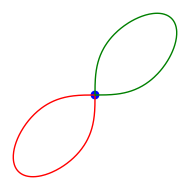

In [ ]:
pp1 = polar_plot(rf[0][r], (t, 0, pi/2), color='red')
pp2 = polar_plot(rf[0][r], (t, pi, 3*pi/2), color='green')
pt0 = point((0,0), size=40, color='blue')
(pt0+pp1+pp2).show(figsize=3,axes=False)

## 7. Constrained Optimization

Let $a$ and $b$ be positive numbers.
Consider $f = x^2/a + y/b$ and the unit circle $x^2 + y^2 = 1$.
    
Determine the number of candidate extremal values of $f$ on the unit circle.
   
Use a lexicographic Groebner basis to compute a triangular form of the equations for this problem.

In [ ]:
reset()

In [ ]:
a, b = var('a,b')
f(x,y) = x^2/a + y/b
c(x,y) = x^2 + y^2 - 1
gf = diff(f)
gc = diff(c)
print(gf)
print(gc)

(x, y) |--> (2*x/a, 1/b)
(x, y) |--> (2*x, 2*y)


We introduce a new variable to apply the technique of Lagrange multipliers.

In [ ]:
Lambda = var('Lambda')
sf = [gf(x,y)[k] - Lambda*gc(x,y)[k] for k in range(2)]
sf.append(c(x,y))
sf

[-2*Lambda*x + 2*x/a, -2*Lambda*y + 1/b, x^2 + y^2 - 1]

To determine the number, we can bring the system in triangular form.

In [ ]:
PR.<x,y,a,b,Lambda> = PolynomialRing(QQ, order='lex')
PR

Multivariate Polynomial Ring in x, y, a, b, Lambda over Rational Field

Be aware that the constraints are rational expressions!

In [ ]:
ss = [p.numerator() for p in sf]
ss

[-2*Lambda*a*x + 2*x, -2*Lambda*b*y + 1, x^2 + y^2 - 1]

In [ ]:
sf2 = [PR(p) for p in ss]
sf2

[-2*x*a*Lambda + 2*x, -2*y*b*Lambda + 1, x^2 + y^2 - 1]

Now we can compute a lexicographic Groebner basis.

In [ ]:
J = ideal(sf2)
g = J.groebner_basis()
g

[x^2 + y^2 - 1, x*a*Lambda - x, y*a*Lambda - y - 2*a*b*Lambda^2 + 2*b*Lambda, y*b + 2*a*b^2*Lambda^2 - 1/2*a - 2*b^2*Lambda, a*b^2*Lambda^3 - 1/4*a*Lambda - b^2*Lambda^2 + 1/4]

Keeping in mind that a and b are parameters,
and that the variables are x, y, and Lambda,
we read off the triangular structure of the basis:

1. There is a polynomial of degree 3 in Lambda.
 
2. x and y appear linearly as equations in Lambda.

Thus, there are 3 solutions, for generic values of the parameters a and b.

**Extra Question:** Solve this problem numerically for a = 2, and b = 3.

In [ ]:
g23 = [p(a = 2, b = 3) for p in g]
g23

[x^2 + y^2 - 1,
 2*x*Lambda - x,
 2*y*Lambda - y - 12*Lambda^2 + 6*Lambda,
 3*y + 36*Lambda^2 - 18*Lambda - 1,
 18*Lambda^3 - 9*Lambda^2 - 1/2*Lambda + 1/4]

In order to solve this problem properly, we must cast the polynomials in a ring with variables, x, y, and Lambda.

In [ ]:
QR.<x, y, Lambda> = PolynomialRing(QQ, order='lex')
QR

Multivariate Polynomial Ring in x, y, Lambda over Rational Field

In [ ]:
G23 = [QR(p) for p in g23]
G23

[x^2 + y^2 - 1,
 2*x*Lambda - x,
 2*y*Lambda - y - 12*Lambda^2 + 6*Lambda,
 3*y + 36*Lambda^2 - 18*Lambda - 1,
 18*Lambda^3 - 9*Lambda^2 - 1/2*Lambda + 1/4]

In [ ]:
J23 = ideal(G23)
J23.variety(QQbar)

[{Lambda: 0.50000000000000000?, y: 0.3333333333333334?, x: -0.9428090415820634?},
 {Lambda: 0.50000000000000000?, y: 0.3333333333333334?, x: 0.9428090415820634?},
 {Lambda: 0.1666666666666667?, y: 1, x: 0},
 {Lambda: -0.1666666666666667?, y: -1, x: 0}]

We see that for the particular values of 2 and 3 for a and b, we have four solutions.

## 8. Solving a Linear System

Do the following.

1. Create a 5-by-5 matrix $A$ over the rationals where 
   the $(i,j)$-the element is $1/(i+j)$ (for $i$ and $j$ both from 1 to 5).

2. Define $b$ as a vector of length 5 of ones.
   Solve the system defined by $A x = b$.
   
3. Verify that $b - A x$ equals zero.

In [ ]:
reset()

In [ ]:
A = matrix(QQ, 5, 5, lambda i,j: 1/(i+j+2))
A

[ 1/2  1/3  1/4  1/5  1/6]
[ 1/3  1/4  1/5  1/6  1/7]
[ 1/4  1/5  1/6  1/7  1/8]
[ 1/5  1/6  1/7  1/8  1/9]
[ 1/6  1/7  1/8  1/9 1/10]

In [ ]:
b = vector(QQ, [1 for k in range(5)])
b

(1, 1, 1, 1, 1)

In [ ]:
x = A\b
x

(30, -420, 1680, -2520, 1260)

In [ ]:
b - A*x

(0, 0, 0, 0, 0)

## 9. An Initial Value Problem

Consider the intial value problem $dy/dt = 2 - 6y$, $y(0) = -1$.

1. Solve this problem and plot the solution trajectory for $t \in [0,2]$.
    
2. Plot the slope field for $t \in [0,2]$, $y \in [-1,0.5]$.
  
   Place also the particular solution computed the first part of this question on the plot.

In [ ]:
reset()

In [ ]:
t = var('t')
y = function('y')(t)
ode = diff(y,t) == 2 - 6*y
ode

diff(y(t), t) == -6*y(t) + 2

In [ ]:
sol = desolve(ode,y,ics=[0,-1])
sol

1/3*(e^(6*t) - 4)*e^(-6*t)

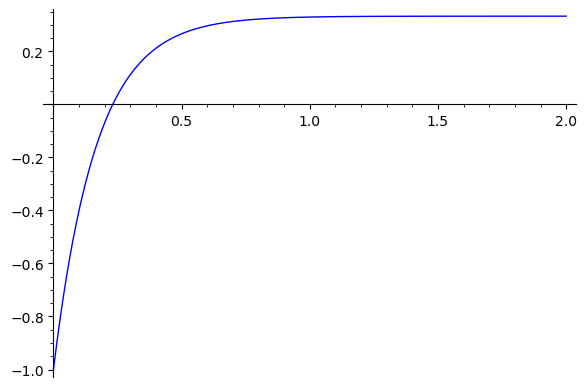

In [ ]:
plotsol = plot(sol,t,0,2)
plotsol.show()

In [ ]:
r = ode.rhs()
r

-6*y(t) + 2

In [ ]:
sol

1/3*(e^(6*t) - 4)*e^(-6*t)

In [ ]:
sr = r.subs({y(t=t):sol})
sr

-2*(e^(6*t) - 4)*e^(-6*t) + 2

In [ ]:
Y = var('Y')

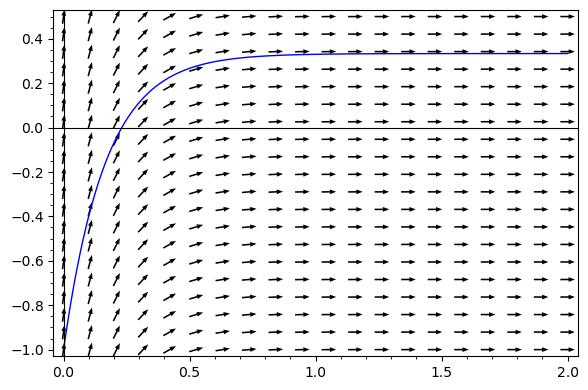

In [ ]:
pslopes = plot_slope_field(sr,(t,0,2),(Y,-1,0.5),headlength=4,headaxislength=4)
(pslopes+plotsol).show()

## 10. Polyhedral Optimization

Minimize $x+3y$ 

subject to $x \geq 2$, $y \geq 1$, $x + 2y \leq 8$, $x+y \leq 6$.
    
Formulate the linear programming problem and solve it.

In [ ]:
reset()

In [ ]:
p = MixedIntegerLinearProgram(maximization=False)
p.show()

Minimization:
  

Constraints:
Variables:


In [ ]:
x = p.new_variable(nonnegative=True)
p.set_objective(x[1] + 3*x[2])
p.show()

Minimization:
  x_0 + 3.0 x_1 

Constraints:
Variables:
  x_0 is a continuous variable (min=0.0, max=+oo)
  x_1 is a continuous variable (min=0.0, max=+oo)


In [ ]:
p.add_constraint(x[1], min=2)
p.add_constraint(x[2], min=1)
p.add_constraint(x[1]+2*x[2], max=8)
p.add_constraint(x[1]+x[2], max=6)
p.show()

Minimization:
  x_0 + 3.0 x_1 

Constraints:
  2.0 <= x_0 
  1.0 <= x_1 
  x_0 + 2.0 x_1 <= 8.0
  x_0 + x_1 <= 6.0
Variables:
  x_0 is a continuous variable (min=0.0, max=+oo)
  x_1 is a continuous variable (min=0.0, max=+oo)


In [ ]:
p.solve()

5.0

In [ ]:
p.get_values(x)

{1: 2.0, 2: 1.0}

The optimal value 5 is obtained at (2, 1).

# Review 3 - Answers combined
- We review the first two parts of the course for the final exam. 
- Below are **both Q & A** to the review problems for the first part of the course.

## 1. Our First Steps

### question 1.

 Explain the difference between ``RDF`` and ``RR``.  Illustrate with an example.

### answer to question 1

 ``RDF`` corresponds to the hardware doubles,
whereas ``RR`` has a default precision of 53 bits.

In [ ]:
reset()

In [ ]:
print(RDF)
print(RR)

Real Double Field
Real Field with 53 bits of precision


In [ ]:
a = RDF(pi)
print(a, 'has type', type(a))
b = RR(pi)
print(b, 'has type', type(b))

3.141592653589793 has type <class 'sage.rings.real_double_element_gsl.RealDoubleElement_gsl'>
3.14159265358979 has type <class 'sage.rings.real_mpfr.RealNumber'>


### question 2

Give a list of ten rational approximations for ``sqrt(3)``, accurate with 2, 3, up to 11 decimal places.

### answer to question 2

In [ ]:
reset()

In [ ]:
x = sqrt(3)
[QQ(x.n(digits=k)) for k in range(2,12)]

[26/15,
 265/153,
 362/209,
 989/571,
 8733/5042,
 18817/10864,
 70226/40545,
 191861/110771,
 716035/413403,
 1694157/978122]

### question 3

Consider $Z_{31}$.  What is the multiplicative inverse of 7?
   
Show that $15 x^5 + 4 x^4 + 23 x^3 + 26 x^2 + 6 x + 1$ is irreducible over $Z_{31}$.

### answer to question 3

In [ ]:
reset()

In [ ]:
Z31 = GF(31)
Z31.multiplication_table()

 *  aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax ay az ba bb bc bd be
  +---------------------------------------------------------------------------------------------
aa| aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa aa
ab| aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax ay az ba bb bc bd be
ac| aa ac ae ag ai ak am ao aq as au aw ay ba bc be ab ad af ah aj al an ap ar at av ax az bb bd
ad| aa ad ag aj am ap as av ay bb be ac af ai al ao ar au ax ba bd ab ae ah ak an aq at aw az bc
ae| aa ae ai am aq au ay bc ab af aj an ar av az bd ac ag ak ao as aw ba be ad ah al ap at ax bb
af| aa af ak ap au az be ae aj ao at ay bd ad ai an as ax bc ac ah am ar aw bb ab ag al aq av ba
ag| aa ag am as ay be af al ar ax bd ae ak aq aw bc ad aj ap av bb ac ai ao au ba ab ah an at az
ah| aa ah ao av bc ae al as az ab ai ap aw bd af am at ba ac aj aq ax be ag an au bb ad ak ar ay
ai| aa ai aq ay ab aj ar az ac

In [ ]:
i7 = Z31(1/7)
i7

9

We see that the multiplicative inverse of 7 modulo 31 is 9.  Let us verify this:

In [ ]:
Z31(7*i7)

1

Indeed, 9 is the inverse of 7 modulo 31.

Let us now solve the second part of the question.

In [ ]:
x = polygen(Z31)
p = 15*x^5 + 4*x^4 + 23*x^3 + 26*x^2 + 6*x + 1
p

15*x^5 + 4*x^4 + 23*x^3 + 26*x^2 + 6*x + 1

In [ ]:
type(p)

<class 'sage.rings.polynomial.polynomial_zmod_flint.Polynomial_zmod_flint'>

The ``type(p)`` verifies that ``p`` is not a general symbolic expression, but a particular type of polynomial.

In [ ]:
p.factor()

(15) * (x^5 + 23*x^4 + 16*x^3 + 10*x^2 + 19*x + 29)

In [ ]:
p.is_irreducible()

True

Both ``p.factor()`` and ``p.is_irreducible()`` show that the polynomial is irreducible.

Instead of ``polygen(GF(31))``, we can also use ``PolynomialRing``,
which gives the same type of polynomial.

In [ ]:
reset()

In [ ]:
R.<x> = PolynomialRing(GF(31))
p = 15*x^5 + 4*x^4 + 23*x^3 + 26*x^2 + 6*x + 1
print(p, 'has type', type(p))

15*x^5 + 4*x^4 + 23*x^3 + 26*x^2 + 6*x + 1 has type <class 'sage.rings.polynomial.polynomial_zmod_flint.Polynomial_zmod_flint'>


In [ ]:
p.is_irreducible()

True

### question 4

Expand ``exp(I*2*Pi/k)`` as ``cos(2*Pi/k) + I*sin(2*Pi/k)``.

### answer to question 4

In [ ]:
reset()

In [ ]:
k = SR.symbol('k', domain='real')
t = exp(I*2*pi/k)
t

e^(2*I*pi/k)

In [ ]:
t.real() + I*t.imag()

cos(2*pi/k) + I*sin(2*pi/k)

### question 5

Consider ``q = cos(x^3 - 1) + 3*sin(y) - z^7``.  Draw the expression tree of ``q``.

### answer to question 5

In [ ]:
reset()

In [ ]:
x, y, z = var('x,y,z')
q = cos(x^3 - 1) + 3*sin(y) - z^7
q

-z^7 + cos(x^3 - 1) + 3*sin(y)

In [ ]:
q.operands()

[-z^7, cos(x^3 - 1), 3*sin(y)]

In [ ]:
q.operator()

<function add_vararg at 0x7f0fc7082830>

In [ ]:
(q0, q1, q2) = q.operands()
print('q0 :', q0.operator(), q0.operands())
print('q1 :', q1.operator(), q1.operands())
print('q2 :', q2.operator(), q2.operands())

q0 : <function mul_vararg at 0x7f0fc70828c0> [z^7, -1]
q1 : cos [x^3 - 1]
q2 : <function mul_vararg at 0x7f0fc70828c0> [sin(y), 3]


In [ ]:
q00 = q0.operands()[0]
print('q00 :', q00.operator(), q00.operands())

q00 : <built-in function pow> [z, 7]


Now we have enough information to draw the expression tree.

Let us start representing all leaves.

In [ ]:
Lx = LabelledOrderedTree([], label='x')
Ly = LabelledOrderedTree([], label='y')
Lz = LabelledOrderedTree([], label='z')
L7 = LabelledOrderedTree([], label='7')
Lm1 = LabelledOrderedTree([], label='-1')
L3 = LabelledOrderedTree([], label='3')

We start with the ``- z^7``.

In [ ]:
Lz7 = LabelledOrderedTree([Lz,L7], label='pow')
Lop1 = LabelledOrderedTree([Lz7,Lm1], label='mul')
ascii_art(Lop1)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fc36c4700>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

The second operand is ``cos(x^3-1)``.

In [ ]:
Lx3 = LabelledOrderedTree([Lx,L3], label='pow')
Lx3m1 = LabelledOrderedTree([Lx3,Lm1], label='add')
Lop2 = LabelledOrderedTree([Lx3m1], label='cos')
ascii_art(Lop2)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fc36c5870>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

Then the third operand is ``3*sin(y)``

In [ ]:
Lsin = LabelledOrderedTree([Ly], label='sin')
Lop3 = LabelledOrderedTree([L3,Lsin], label='mul')
ascii_art(Lop3)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fc36c4340>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

Now we can assemble the tree.

In [ ]:
tree = LabelledOrderedTree([Lop1,Lop2,Lop3], label='add')
ascii_art(tree)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fc36c6500>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

### question 6

Save a random matrix to file, destroy its reference,
and load then the saved matrix back into SageMath.

### answer question 6

In [ ]:
reset()

In [ ]:
M = Matrix(3,4,lambda i,j: RR.random_element())
M

[  0.621660021942880   0.649467962756092  -0.554103848766790  0.0227078641543150]
[  0.404637308293002  -0.722876671193864  -0.266150461564519 -0.0663804221933906]
[ -0.141812483491682  -0.694540150031590  -0.167627160357438   0.693178157317415]

In [ ]:
M.save('ourmatrix')

In [ ]:
M = var('M')
M

M

In [ ]:
M = load('ourmatrix.sobj')
M

[  0.621660021942880   0.649467962756092  -0.554103848766790  0.0227078641543150]
[  0.404637308293002  -0.722876671193864  -0.266150461564519 -0.0663804221933906]
[ -0.141812483491682  -0.694540150031590  -0.167627160357438   0.693178157317415]

### question 7

Consider ``p = 79*x^298+56*x^205+49*x^164+63*x^121+57*x^119−59*x^42``.

1. Generate optimized code to evaluate ``p``.
  
2. How many operations are needed to evaluate ``p``?
   
3. Compare with the cost of the direct evaluation of ``p``.

### answer to question 7

In [ ]:
reset()

In [ ]:
x = var('x')
p = 79*x^298  + 56*x^205 + 49*x^164 + 63*x^121 + 57*x^119 - 59*x^42
p

79*x^298 + 56*x^205 + 49*x^164 + 63*x^121 + 57*x^119 - 59*x^42

In [ ]:
q = fast_callable(p,vars=['x'])
q.op_list()

[('load_arg', 0),
 ('ipow', 298),
 ('load_const', 79),
 'mul',
 ('load_arg', 0),
 ('ipow', 205),
 ('load_const', 56),
 'mul',
 'add',
 ('load_arg', 0),
 ('ipow', 164),
 ('load_const', 49),
 'mul',
 'add',
 ('load_arg', 0),
 ('ipow', 121),
 ('load_const', 63),
 'mul',
 'add',
 ('load_arg', 0),
 ('ipow', 119),
 ('load_const', 57),
 'mul',
 'add',
 ('load_arg', 0),
 ('ipow', 42),
 ('load_const', -59),
 'mul',
 'add',
 'return']

In [ ]:
print('number of operations :', len(q.op_list()))

number of operations : 30


In the ``fast_callable`` evaluation, we have six exponentiations (``ipow``),
six multiplications with a coefficient, and five additions.
In the direct evaluation, without ``ipow``, the number of multiplications is
the sum of the degrees of the operands of p.

In [ ]:
pdegs = [t.degree(x) for t in p.operands()]
pdegs

[298, 205, 164, 121, 119, 42]

In [ ]:
print('number of multiplications:', sum(pdegs))

number of multiplications: 949


### question 8

Consider the right hand side of

$$
   \int_1^2 \frac{1}{x} dx \approx \frac{1}{2n} \left( 1 + \frac{1}{2} \right)
                                  + \frac{1}{n} \sum_{k=1}^n \left( \frac{1}{1 + k/n} \right).
$$

1. Write a Python function ``P`` to define the evaluation of the right hand side of the above sum,
   for any value for $n$ which is the input parameter to the function.
   
   Compare the value of ``P(10000)`` with the exact value of the integral.
   
   Time the execution of the function for $n = 10,000$.
   
   
2. Use vectorization to define a more efficient function ``F`` which computes the same sum as ``P``
   and which also takes $n$ as the input parameter.

   Compare the value of ``F(10000)`` with the exact value of the integral.
   
   Time the execution of the function for $n = 10,000$.
   
Compare the result of the timings.

### answer to question 8

In [ ]:
reset()

In [ ]:
P = lambda n: (1.0 + 0.5)/(2*n) + sum(1/(1+k/n) for k in range(1, n))/n 

In [ ]:
p10000 = P(10000)
p10000

0.693147181184945

In [ ]:
exact = integral(1/x, (x, 1, 2), hold=True).n()
exact

0.6931471805599452

In [ ]:
p10000 - exact

6.25000162735034e-10

We see that the error of the approximate sum is about $6.25 \times 10^{-10}$ which is accurate enough.

In [ ]:
timeit('P(10000)')

25 loops, best of 3: 16.9 ms per loop

Now we import ``numpy`` to apply the vectorization.

In [ ]:
import numpy as np

In [ ]:
def F(n):
    """
    Applies vectorization to the trapezoidal rule
    with n function evaluations.
    """
    pts = np.linspace(1.0 + 1.0/n, 2.0 - 1.0/n, n-1)
    return ((1.0 + 0.5)/(2*n) + sum(1/pts)/n)

In [ ]:
f10000 = F(10000)
f10000

0.6931471811849453

In [ ]:
f10000 - exact

6.250001627350343e-10

We see the same error as before.

In [ ]:
timeit('F(10000)')

625 loops, best of 3: 42.8 μs per loop

We observe that by vectorization, the time has dropped from 52 milliseconds to 151 microseconds.

## 2. Polynomials and Rational Expressions

### question 9

Draw the expression tree of ``x*y*(x-y)``.

### answer to question 9

In [ ]:
reset()

In [ ]:
x, y = var('x,y')
p = x*y*(x-y)
p

(x - y)*x*y

In [ ]:
p.operator()

<function mul_vararg at 0x7f0fc70828c0>

In [ ]:
p.operands()

[x - y, x, y]

In [ ]:
p0 = p.operands()[0]
print('p0 :', p0, p0.operator(), p0.operands())

p0 : x - y <function add_vararg at 0x7f0fc7082830> [x, -y]


In [ ]:
p1 = p0.operands()[1]
print('p1 :', p1, p1.operator(), p1.operands())

p1 : -y <function mul_vararg at 0x7f0fc70828c0> [y, -1]


We now have enough information to draw the expression tree.

To represent the tree via LabelledOrderedTree,
we can start defining the leaves: ``x``, ``y``, and ``-1``.

In [ ]:
Lx = LabelledOrderedTree([], label='x')
Ly = LabelledOrderedTree([], label='y')
Lm1 = LabelledOrderedTree([], label='-1')
# The x - y is represented as x + (-1)*y
Lmy = LabelledOrderedTree([Ly,Lm1],label='mul')
Lop1 = LabelledOrderedTree([Lx,Lmy],label='add')
ascii_art(Lop1)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fb917d420>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

Then the expression tree has Lop1 as the first child,
the other two children are ``Lx`` and ``Ly``.

In [ ]:
tree = LabelledOrderedTree([Lop1, Lx, Ly], label='mul')
ascii_art(tree)

<repr(<sage.typeset.ascii_art.AsciiArt at 0x7f0fb917c2b0>) failed: OSError: [Errno 25] Inappropriate ioctl for device>

### question 10

Consider $p = x^3 - x - 2$ and give all Sage commands for an exact,
numeric, and symbolic factorization.

In particular, answer the following questions.
   
1. How can you write $p$ as an *exact* product of
   linear factors, with *exact* complex numbers?
      
2. Compute a *numerical* factorization
   of $p$ over the complex numbers.
      
3. Define a *symbolic* (i.e.: formal) factorization of $p$,
   declaring sufficiently many roots.
   
4. Compute a *symbolic-numeric* factorization of $p$.

### answer to question 10

In [ ]:
reset()

In [ ]:
x = var('x')
p = x^3 - x - 2
p

x^3 - x - 2

In [ ]:
r = p.roots()
r

[(-1/2*(1/9*sqrt(26)*sqrt(3) + 1)^(1/3)*(I*sqrt(3) + 1) - 1/6*(-I*sqrt(3) + 1)/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3),
  1),
 (-1/2*(1/9*sqrt(26)*sqrt(3) + 1)^(1/3)*(-I*sqrt(3) + 1) - 1/6*(I*sqrt(3) + 1)/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3),
  1),
 ((1/9*sqrt(26)*sqrt(3) + 1)^(1/3) + 1/3/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3), 1)]

We can assemble the exact factorization from the exact roots.

In [ ]:
prod([x - root[0] for root in r])

1/108*(3*(1/9*sqrt(26)*sqrt(3) + 1)^(1/3)*(I*sqrt(3) + 1) + 6*x + (-I*sqrt(3) + 1)/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3))*(3*(1/9*sqrt(26)*sqrt(3) + 1)^(1/3)*(-I*sqrt(3) + 1) + 6*x + (I*sqrt(3) + 1)/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3))*(3*x - 3*(1/9*sqrt(26)*sqrt(3) + 1)^(1/3) - 1/(1/9*sqrt(26)*sqrt(3) + 1)^(1/3))

The numerical factorization is over the complex number field.

In [ ]:
q = CC['x'](p)
q.factor()

(x - 1.52137970680457) * (x + 0.760689853402284 - 0.857873626595179*I) * (x + 0.760689853402284 + 0.857873626595179*I)

Let us now do the symbolic factorization.

In [ ]:
K.<a> = NumberField(p) 
K

Number Field in a with defining polynomial x^3 - x - 2

In [ ]:
kp = K['x'](p)
kp.factor()

(x - a) * (x^2 + a*x + a^2 - 1)

In [ ]:
kpb = list(kp.factor())[1]
L.<b> = NumberField(kpb[0])
L

Number Field in b with defining polynomial x^2 + a*x + a^2 - 1 over its base field

In [ ]:
lkp = L['x'](kp)
lkp.factor()

(x + b + a) * (x - b) * (x - a)

The symbolic-numeric factorization works over the field ``QQbar``, extending the complex number with complex intervals.

In [ ]:
factor(QQbar[x](p))

(x - 1.521379706804568?) * (x + 0.7606898534022837? - 0.8578736265951787?*I) * (x + 0.7606898534022837? + 0.8578736265951787?*I)

### question 11

Give all the sage commands to convert ``(x-y)*(x+y)`` into ``(x+y)*x = (x+y)*y``.

### answer to question 11

In [ ]:
reset()

In [ ]:
x,y,z = var('x,y,z')
p = (x-y)*(x+y)
p

(x + y)*(x - y)

In [ ]:
q = p.subs({x+y:z})
q

(x - y)*z

In [ ]:
r = q.expand()
r.subs(z=x+y)

(x + y)*x - (x + y)*y

### question 12

Consider $r = (79*x^5 + 56*x^4 + 49*x^3 + 63*x^2 + 57*x - 59)/(45*x^5 - 8*x^4 - 93*x^2 + 43*x - 62)$.

1. How many operations does it take to evaluate $r$ with a partial fraction decomposition? 

2. Compare this number of operations with the Horner forms of numerator and denominator for r.

### answer to question 12

In [ ]:
reset()

In [ ]:
R.<x> = PolynomialRing(CC)
r = (79*x^5 + 56*x^4 + 49*x^3 + 63*x^2 + 57*x - 59)/(45*x^5 - 8*x^4 - 93*x^2 + 43*x - 62)
show(r)

(79.0000000000000*x^5 + 56.0000000000000*x^4 + 49.0000000000000*x^3 + 63.0000000000000*x^2 + 57.0000000000000*x - 59.0000000000000)/(45.0000000000000*x^5 - 8.00000000000000*x^4 - 93.0000000000000*x^2 + 43.0000000000000*x - 62.0000000000000)

In [ ]:
q = r.partial_fraction_decomposition()
q

(1.75555555555556,
 [1.73033923026938/(x - 1.34613302859424),
  (-0.209546357895326 - 0.317866843685468*I)/(x - 0.243395948193229 - 0.710544938063163*I),
  (-0.209546357895326 + 0.317866843685468*I)/(x - 0.243395948193229 + 0.710544938063163*I),
  (0.122648347698910 + 0.522394270600454*I)/(x + 0.827573573601461 - 1.06277001016849*I),
  (0.122648347698910 - 0.522394270600454*I)/(x + 0.827573573601461 + 1.06277001016849*I)])

If we would use the Horner form to evaluate numerator and denominator,
then we need 5 multiplications and 5 additions, with one division.
The partial fraction decomposition gives 5 divisions and 5 (complex) additions.

### question 13

Explain why normal forms are so important to symbolic computation. 

What can we do if a normal form is too expensive to compute? Illustrate with a good example.

### answer to question 13

With a normal form we can decide whether two expressions are equal to each other.
The normalization for rational expression is the removal of common factors in the numerator
and the denominator.  This may lead to expression swell, as the example below shows.
We can apply a probability one numerical evaluation test.
We generate a random number and evaluate the expression to see if the expression is zero or not.

In [ ]:
reset()

In [ ]:
x = var('x')
p = (x^100 - 1)/(x - 1)
p

(x^100 - 1)/(x - 1)

In [ ]:
p.numerator()

x^99 + x^98 + x^97 + x^96 + x^95 + x^94 + x^93 + x^92 + x^91 + x^90 + x^89 + x^88 + x^87 + x^86 + x^85 + x^84 + x^83 + x^82 + x^81 + x^80 + x^79 + x^78 + x^77 + x^76 + x^75 + x^74 + x^73 + x^72 + x^71 + x^70 + x^69 + x^68 + x^67 + x^66 + x^65 + x^64 + x^63 + x^62 + x^61 + x^60 + x^59 + x^58 + x^57 + x^56 + x^55 + x^54 + x^53 + x^52 + x^51 + x^50 + x^49 + x^48 + x^47 + x^46 + x^45 + x^44 + x^43 + x^42 + x^41 + x^40 + x^39 + x^38 + x^37 + x^36 + x^35 + x^34 + x^33 + x^32 + x^31 + x^30 + x^29 + x^28 + x^27 + x^26 + x^25 + x^24 + x^23 + x^22 + x^21 + x^20 + x^19 + x^18 + x^17 + x^16 + x^15 + x^14 + x^13 + x^12 + x^11 + x^10 + x^9 + x^8 + x^7 + x^6 + x^5 + x^4 + x^3 + x^2 + x + 1

In [ ]:
p(x=RR.random_element())

0.685474316298453

We see that, when evaluated at a random element, the nonzero value shows that the expression is not zero.

# Review 4
- We review the second half of the course.

## Part 3. Calculus

### question 1

Write a function to make polynomials in a system.
   
The *k*-th polynomial in the system is

$$
      f_k(x_1,x_2, \ldots, x_n) = x_k + \sum_{i=1}^{n-k} x_i x_{k+i},
      \quad k=1,2,\ldots,n.
$$

Test your function on 8 variables.

### answer to question 1

In [ ]:
reset()

In [ ]:
X = [var('x' + '%d' % k) for k in range(1,9)]
X

[x1, x2, x3, x4, x5, x6, x7, x8]

In [ ]:
f = lambda X,k,n: X[k-1] + sum([X[i]*X[k+i] for i in range(0,n-k)])

In [ ]:
[f(X, k, 8) for k in range(1, 9)]

[x1*x2 + x2*x3 + x3*x4 + x4*x5 + x5*x6 + x6*x7 + x7*x8 + x1,
 x1*x3 + x2*x4 + x3*x5 + x4*x6 + x5*x7 + x6*x8 + x2,
 x1*x4 + x2*x5 + x3*x6 + x4*x7 + x5*x8 + x3,
 x1*x5 + x2*x6 + x3*x7 + x4*x8 + x4,
 x1*x6 + x2*x7 + x3*x8 + x5,
 x1*x7 + x2*x8 + x6,
 x1*x8 + x7,
 x8]

### question 2

Define a piecewise function ``int_inv_cub`` which
as function of the end point $b$ is defined as

$$
   \int_{-1}^b \frac{1}{x^3} dx
$$

and which must be correct for *any* value of the parameter $b$.

### answer to question 2

In [ ]:
reset()

In [ ]:
b = var('b')

In [ ]:
i = integral(1/x^3, (x,-1,b), hold=True)
i.show()

integrate(x^(-3), x, -1, b)

Without ``hold=True`` an error message prompts ``Is b+1 positive, negative or zero?``

Let us assume that $b+1<0$ or $b<-1$.

In [ ]:
assume(b+1<0)
negval = integral(1/x^3, (x,-1,b)).unhold()
show(negval)

-1/2/b^2 + 1/2

We needed another assumption $b > 0$.
We reset to test other cases.

In [ ]:
reset()
b = var('b')
assume(b+1>0, b>0)
infval = integral(1/x^3, (x,-1,b), hold=True)
infval.show()

integrate(x^(-3), x, -1, b)

We get another error message for the above case.
The value is infinity if 0 is in $[-1,b]$.

We needed another assumption $b > -1$ and $b < 0$.
We reset to test other cases.

In [ ]:
reset()
b = var('b')
assume(b+1>0,b<0)
negval = integral(1/x^3, (x,-1,b))
negval.show()

-1/2/b^2 + 1/2

So far, we have the following cases for $b$:
    
1. $-\infty < b < -1$ : $-1/2/b^2 + 1/2$
2. $-1 < b < 0$ : $-1/2/b^2 + 1/2$
3. $b > 0 : \infty$ 
    
Two cases are left to consider: $b = -1$ and $b = 0$.

In [ ]:
integral(1/x^3, (x,-1,-1))

0

In [ ]:
integral(1/x^3, (x,-1,0), hold=True).show()

integrate(x^(-3), x, -1, 0)

The above integral is divergent and we will assign it the value $\infty$.

Finally, this is the complete case analysis:

1. $-\infty < b < -1$ : $-1/2/b^2 + 1/2$

2. $b = -1$ : 0

3. $-1 < b < 0$ : $-1/2/b^2 + 1/2$

4. $b \geq 0$ : $\infty$ 

In [ ]:
reset()
b = var('b')
int_inv_cub = piecewise([((-oo,-1),-1/2/b^2 + 1/2), \
                         ([-1,-1],0),((-1,0),-1/2/b^2 + 1/2),\
                         ([0,0],oo),((0,oo),oo)])

Let us check all cases.

In [ ]:
int_inv_cub(-2)

3/8

In [ ]:
int_inv_cub(-1)

0

In [ ]:
int_inv_cub(-1/2)

-3/2

In [ ]:
int_inv_cub(0)

+Infinity

In [ ]:
int_inv_cub(1)

+Infinity

### question 3

The arc length of continuous function $f(x)$ over an interval $[a,b]$ is

$$
    \int_a^t \sqrt{1+[f'(x)]^2}.
$$
                      
1. Compute the arc length of the positive half
   of the unit circle, i.e.: $f(x) = \sqrt{1-x^2}$
   
   (*answer:* $\pi$).


2. Create a function (call it ``arc_length``) in $t$
   which returns a 10-digit floating-point approximation
   of the arc length of the positive half of the circle,
   for $x \in [0,t]$.

### answer to question 3

In [ ]:
reset()

In [ ]:
x = var('x')
f = sqrt(1-x**2)
df = diff(f,x)
df.show()

-x/sqrt(-x^2 + 1)

In [ ]:
integral(sqrt(1+df^2),(x,-1,1))

pi

In [ ]:
def arc_length(t):
    """
    Returns the arc length of the circle for x in [0, t].
    """
    i = integral(sqrt(1+df^2),(x,0,t), hold=True)
    return i.n(digits=10)

In [ ]:
arc_length(1)

1.570796313279659

### question 4

Consider the recurrence relation

$$
      h(n) = 5 h(n-1) - 6 h(n-2), \mbox{ for } n \geq 2,
      \mbox{ with } h(0) = 1 \mbox{ and } h(1) = -2.
$$

Answer the following the questions.

1. The generating function

   $$
        g(x) = \frac{1-7x}{1-5x + 6x^2}
   $$
   
   defines $h(n)$ as the coefficient with $x^n$ in the Taylor
   expansion of $g(x)$.  
   
   Use $g(x)$ to define $h$ as a function (call it ``t``) of $n$ 
   which gives the value of $h(n)$.


2. Write a function to compute $h(n)$, directly using the
   recurrence relation from above.  
   
   Make sure your function can compute $h(120)$.  
   
   Compare with the result of the first part of the question.

### answer to question 4

In [ ]:
reset()

In [ ]:
x = var('x')
g = (1-7*x)/(1-5*x+6*x^2)
taylor(g,x,0,9)

-76172*x^9 - 24964*x^8 - 8108*x^7 - 2596*x^6 - 812*x^5 - 244*x^4 - 68*x^3 - 16*x^2 - 2*x + 1

In [ ]:
def t(n):
    """
    Returns the value of h(n) using the
    Taylor series of the generating function.
    """
    tn = taylor(g,x,0,n)
    return tn.coefficient(x,n)

In [ ]:
[t(k) for k in range(10)]

[1, -2, -16, -68, -244, -812, -2596, -8108, -24964, -76172]

Now we solve the second part of the question
and use the recursion relation.

In [ ]:
def h(n, D={}):
    """
    Applies memoization to compute h(n).
    """
    if n in D:
        return D[n]
    else:
        if(n == 0):
            result = 1
        elif(n == 1):
            result = -2
        else:
            result = 5*h(n-1) - 6*h(n-2)
        D[n] = result
        return result

In [ ]:
[h(k) for k in range(10)]

[1, -2, -16, -68, -244, -812, -2596, -8108, -24964, -76172]

We observe that we get the same sequence of numbers as before.

In [ ]:
h(120)

-7188041199657724841646073178059495579561383474850002702724

Thanks to the memoization, the function ``h`` can efficiently compute `$h(120)$.

### question 5

The Legendre polynomials are defined by

$$
      P_0(x) = 1, \quad P_1(x) = x,
      \quad P_n(x) = \frac{2n-1}{n} x P_{n-1}(x)
      - \frac{n-1}{n} P_{n-2}(x), \ {\rm for} \ n \geq 2.
$$

Write an *efficient, recursive* function ``legendre`` to compute
$P_n(x)$.  The function ``legendre`` takes on input
   the degree $n$ and the variable $x$.

   
Compare the output of your ``legendre`` (50, $x$ )
with the ``legendre_P`` (50, $x$ ).

### answer to question 5

In [ ]:
reset()

In [ ]:
def legendre(n, x, D={}):
    """
    Returns the n-th Legendre polynomial in x,
    with memoization.
    """
    if (n, x) in D:
        return D[(n, x)]
    else:
        if(n == 0):
            result = 1
        elif(n == 1):
            result = x
        else:
            result = expand((2*n-1)/n*x*legendre(n-1,x) 
                            - (n-1)/n*legendre(n-2,x))
        D[(n, x)] = result
        return result

We test some simple cases.

In [ ]:
legendre(0, x)

1

In [ ]:
legendre(1, x)

x

In [ ]:
legendre(2, x)

3/2*x^2 - 1/2

In [ ]:
legendre(3,x)

5/2*x^3 - 3/2*x

Now, see if we can compute the Legendre polynomial of degree 50.

In [ ]:
legendre(50, x)

12611418068195524166851562157/140737488355328*x^50 - 156050375086257748529223875175/140737488355328*x^48 + 226836112238787036521861509275/35184372088832*x^46 - 823773249709279237895181270525/35184372088832*x^44 + 4189728463575151392735706892025/70368744177664*x^42 - 7928255400303748020099876118755/70368744177664*x^40 + 5790298887862287879848224131675/35184372088832*x^38 - 6684039602901787158511168414725/35184372088832*x^36 + 24770264410753681822717859419275/140737488355328*x^34 - 18602568051449552212241926551825/140737488355328*x^32 + 1423900270604780539702468452115/17592186044416*x^30 - 712769410486857922635873160725/17592186044416*x^28 + 583174972216520118520259858775/35184372088832*x^26 - 194391657405506706173419952925/35184372088832*x^24 + 26248579962778792027330678575/17592186044416*x^22 - 5693353963757653481984400705/17592186044416*x^20 + 7838675747202566388239392275/140737488355328*x^18 - 1052956443654076082002306425/140737488355328*x^16 + 26998883170617335435956575/351843720888

Legendre polynomials are already defined in SageMath.

In [ ]:
x = polygen(QQ)
legendre_P(3,x)

5/2*x^3 - 3/2*x

In [ ]:
legendre_P(50,x) - legendre(50, x)

0

Observe that the test whether our Legendre agrees with the Legendre of SageMath is straightforward because of the canonical form in which the polynomials are stored.

### question 6

Consider the point $P = (1,1)$ on the curve defined by $xy - 2 x + 1 = 0$.

Compute the slope of the tangent line to the curve at $P$ in two ways:

1. with implicit differentiation,

2. with a Taylor series.

### answer to question 6

In [ ]:
reset()

With SageMath, the fastest way to solve this problem is via the Taylor series, truncated after the linear term.  Let us do that first.

In [ ]:
x,y = var('x,y')
f = x*y - 2*x + 1

In [ ]:
ts = taylor(f,(x,1),(y,1),1)
ts

-x + y

We see that the tangent line is $y = x$, therefore, the slope is 1.

Let us now do implicit differentiation.

In [ ]:
Y = function('Y')(x)
F = f(y=Y) == 0
F

x*Y(x) - 2*x + 1 == 0

In [ ]:
dy = diff(Y,x)
dy

diff(Y(x), x)

In [ ]:
dF = diff(F,x)
dF

x*diff(Y(x), x) + Y(x) - 2 == 0

In [ ]:
sol = solve(dF,dy)
sol

[diff(Y(x), x) == -(Y(x) - 2)/x]

In [ ]:
slope = sol[0].rhs()
slope

-(Y(x) - 2)/x

In [ ]:
print('the value of the slope is:', slope.subs({x:1}).subs({Y(x=1):1}))

the value of the slope is: 1


## Part 4: plotting and solving equations

### question 7

Suppose we want to plot the curve $x^4 + x^2 y^2 - y^2 = 0$
for $x$ and $y$ both between $-1$ and $+1$.

1. Sampling this curve as given in rectangular coordinates,
   how many samples do we need to take from the curve to
   obtain a nice plot?
   

2. Convert the curve into polar coordinates and plot.

   How many samples of the curve are needed here?

### answer to question 7

In [ ]:
reset()

In [ ]:
x, y = var('x, y')
f = x^4 + x^2*y^2 - y^2
f

x^4 + x^2*y^2 - y^2

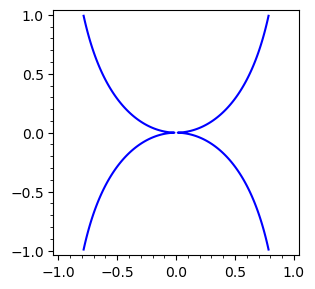

In [ ]:
pltf = implicit_plot(f, (x,-1,+1), (y,-1,+1), plot_points=5000)
pltf.show(figsize=4)

Even with 5000 points (which already takes some time), we do not get a nice plot around (0,0) which is a singular point on this curve in rectangular coordinates.

Let us now convert to polar coordinates.

In [ ]:
r, t = var('r,t')
pf = f.subs(x=r*cos(t),y=r*sin(t))
pf

r^4*cos(t)^4 + r^4*cos(t)^2*sin(t)^2 - r^2*sin(t)^2

In [ ]:
s = solve(pf, r, solution_dict=True)
s

[{r: -sin(t)/(sqrt(cos(t)^2 + sin(t)^2)*cos(t))},
 {r: sin(t)/(sqrt(cos(t)^2 + sin(t)^2)*cos(t))},
 {r: 0}]

Before plotting, let us simplify the expressions.

In [ ]:
rt0 = s[0][r].full_simplify()
rt0

-sin(t)/cos(t)

In [ ]:
rt1 = s[1][r].full_simplify()
rt1

sin(t)/cos(t)

As the $\cos(t)$ appears in the denominator, we have to avoid plotting around multiples of $\pi/2$, otherwise we would divide by zero.

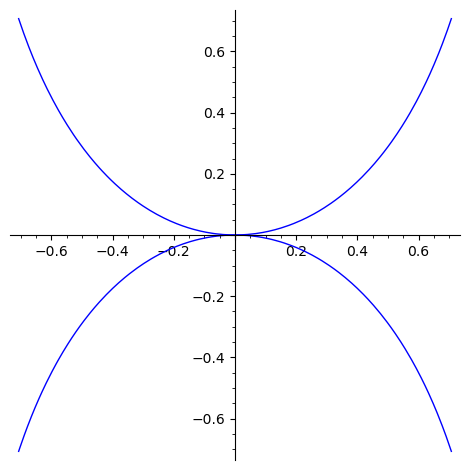

In [ ]:
p0 = polar_plot(rt0, (t, -pi/4, pi/4))
p1 = polar_plot(rt1, (t, -pi/4, pi/4))
(p0+p1).show()

We see that the plot looks good with the default number of plotting points.

Let us try 100 points total for the plots.

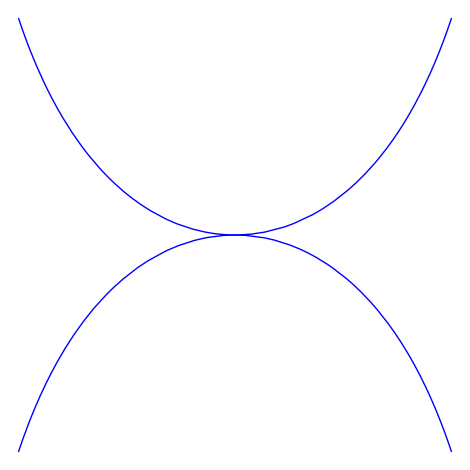

In [ ]:
p0 = polar_plot(rt0, (t, -pi/4, pi/4), plot_points=50)
p1 = polar_plot(rt1, (t, -pi/4, pi/4), plot_points=50)
(p0+p1).show(axes=False)

Conclusion: in rectangular coordinates, even with 5000 plot points we do not get a nice enough plot around the origin.  In polar coordinates, 100 plots suffice.

### question 8

Solve $x^2 a^2 - 2x^2 a - 3 x^2 - x a^2 + 4 x a - 3 x + a^2
   + 2 a - 15$ for $x$ for all values of the parameter $a$.

Be as complete as possible in your description of the solution.

### answer to question 8

In [ ]:
reset()

In [ ]:
x, a = var('x,a')
p = x^2*a^2 - 2*x^2*a - 3*x^2 - x*a^2 + 4*x*a - 3*x + a^2 + 2*a - 15

In [ ]:
sx = solve(p,x)
sx

[x == 1/2*(a - sqrt(-3*a^2 - 26*a - 19) - 1)/(a + 1), x == 1/2*(a + sqrt(-3*a^2 - 26*a - 19) - 1)/(a + 1)]

We see that this solution will not work for $a = -1$.

In [ ]:
px2 = p.coefficient(x,2)
px2

a^2 - 2*a - 3

In [ ]:
sa2 = solve(px2,a)
sa2

[a == 3, a == -1]

Another problem is the value 3 for $a$.

In [ ]:
p3 = p.subs(a = 3)
p3

0

For $a = 3$, the entire polynomial vanishes and x can be anything.

In [ ]:
p4 = p.subs(a = -1)
p4

-8*x - 16

In [ ]:
solve(p4,x)

[x == -2]

For $a = -1$, there is one solution for $x$.

### question 9

Find the point with real coordinates on the curve
$xy - 2 x + 3 = 0$ closest to the origin.

### answer to question 9

3. Find the point with real coordinates on the curve $x y - 2 x + 3$
   closest to the origin.

We apply the technique of Lagrange multipliers.

In [ ]:
reset()

In [ ]:
x, y, Lambda = var('x,y,Lambda')
target(x,y) = x^2 + y^2
target

(x, y) |--> x^2 + y^2

The target expresses the square of the distance of the point $(x, y)$ to the origin $(0,0)$.

In [ ]:
constraint(x,y) = x*y - 2*x + 3
constraint

(x, y) |--> x*y - 2*x + 3

In [ ]:
dt = diff(target)
dt

(x, y) |--> (2*x, 2*y)

In [ ]:
dc = diff(constraint)
dc

(x, y) |--> (y - 2, x)

In [ ]:
sys = [dt(x,y)[0] - Lambda*dc(x,y)[0], \
       dt(x,y)[1] - Lambda*dc(x,y)[1], constraint(x,y)]
sys

[-Lambda*(y - 2) + 2*x, -Lambda*x + 2*y, x*y - 2*x + 3]

In [ ]:
sols = solve(sys,[x,y,Lambda],solution_dict=True)
sols

[{x: 0.493535367624353 + 1.8118700339534315*I,
  y: 1.5801426285062603 + 1.541382927845156*I,
  Lambda: 2.0261972405615523 - 1.1922959243930134*I},
 {x: 0.493535367624353 - 1.8118700339534315*I,
  y: 1.5801426285062603 - 1.541382927845156*I,
  Lambda: 2.0261972405615523 + 1.1922959243930134*I},
 {x: -2.1655756642279553, y: 3.385312783318223, Lambda: -3.126478616924477},
 {x: 1.1785049215216814, y: -0.5455981941309255, Lambda: -0.9259158751696065}]

There are two real solutions and we have to evaluate those two solutions in the target
to see which one is closest to the origin.

In [ ]:
for sol in sols: 
    print(sol, 'has value \n', target(sol[x],sol[y]))

{x: 0.493535367624353 + 1.8118700339534315*I, y: 1.5801426285062603 + 1.541382927845156*I, Lambda: 2.0261972405615523 - 1.1922959243930134*I} has value 
 -2.9183064646721366 + 6.659653628869352*I
{x: 0.493535367624353 - 1.8118700339534315*I, y: 1.5801426285062603 - 1.541382927845156*I, Lambda: 2.0261972405615523 + 1.1922959243930134*I} has value 
 -2.9183064646721366 - 6.659653628869352*I
{x: -2.1655756642279553, y: 3.385312783318223, Lambda: -3.126478616924477} has value 
 16.150060598394123
{x: 1.1785049215216814, y: -0.5455981941309255, Lambda: -0.9259158751696065} has value 
 1.6865512394897515


We see that the last value is the one closest to the origin.

### question 10

How many real solutions does the system defined by $x^2 - 2 y^2 - 1 = 0$
and $x y - 2 x - 3 = 0$ have?

Let us first try to see if we can work over ``QQbar``.

### answer to question 10

In [ ]:
reset()

In [ ]:
R.<x,y> = PolynomialRing(QQbar, order='lex')
p = x^2 - 2*y^2 - 1
q = x*y - 2*x - 3

In [ ]:
J = Ideal([p,q])
J

Ideal (x^2 + (-2)*y^2 - 1, x*y + (-2)*x - 3) of Multivariate Polynomial Ring in x, y over Algebraic Field

In [ ]:
J.variety()

[{y: -0.4808124295021981?, x: -1.209281267831274?},
 {y: 2.747679206408034?, x: 4.012415985744022?},
 {y: 0.8665666115470820? - 1.068362531678099?*I, x: -1.401567358956374? + 1.321102825438973?*I},
 {y: 0.8665666115470820? + 1.068362531678099?*I, x: -1.401567358956374? - 1.321102825438973?*I}]

We see there are two real and two complex conjugated solutions.
Let us verify with a lexicographic Groebner basis.

In [ ]:
RQ.<x,y> = PolynomialRing(QQ, order='lex')
JQ = Ideal([RQ(p),RQ(q)])
JQ

Ideal (x^2 - 2*y^2 - 1, x*y - 2*x - 3) of Multivariate Polynomial Ring in x, y over Rational Field

In [ ]:
gb = JQ.groebner_basis()
gb

[x - 2/3*y^3 + 4/3*y^2 - 1/3*y + 2/3, y^4 - 4*y^3 + 9/2*y^2 - 2*y - 5/2]

The triangular structure of lexicographic Groebner basis shows there are 4 solutions.

In [ ]:
py = gb[1]
print(py, 'has type', type(py))

y^4 - 4*y^3 + 9/2*y^2 - 2*y - 5/2 has type <class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


To find the real roots of py, we have to cast the polynomial in a real ring.
We cannot do this directly from Singular, but convert to a Sage expression.

In [ ]:
z = var('z')
pz = py.subs(y = z)
print(pz, 'has type', type(pz))

z^4 - 4*z^3 + 9/2*z^2 - 2*z - 5/2 has type <class 'sage.symbolic.expression.Expression'>


In [ ]:
rpz = RR['z'](pz)
rpz.roots()

[(-0.480812429502198, 1), (2.74767920640803, 1)]

We now see there are two real solutions.

### question 11

Consider $y'' + 6 y' + 13 y = 0$, with $y(\pi/2) = -2$ and $y'(\pi/2) = 8$.

1. Find an exact solution to this initial value problem
   and use this to create a function $f$ which returns
   a numerical 10-digit floating-point approximation of the solution.
   

2. Solve this initial value problem numerically.
      
   Compare the solution with the value for $y(2)$ and
   also with $f(2)$ obtained in the first part.

### answer to question 11

In [ ]:
reset()

In [ ]:
x,y = var('x,y')
y = function('y')(x)
ode = diff(y,x,2) + 6*diff(y,x) + 13*y
ode

13*y(x) + 6*diff(y(x), x) + diff(y(x), x, x)

In [ ]:
sol = desolve(de=ode, dvar=y, ics=[pi/2, -2, 8])
sol

(2*cos(2*x)*e^(3/2*pi) - e^(3/2*pi)*sin(2*x))*e^(-3*x)

In [ ]:
def funsol(z):
    return sol(x=z).n(digits=10)

In [ ]:
funsol(z=pi/2)

-2.000000000

The system from $y" + 6 y' + 13 y$ is

$y' = z$,

$z' = -6 z - 13 y$,

in the ``rhs()``, ``w[0] = y`` and ``w[1] = y' = z``.

So, for a numerical solver, we define the right hand side

In [ ]:
from scipy.integrate import odeint
from numpy import linspace

In [ ]:
def rhs(w,t):
    return [w[1], -6*w[1] - 13*w[0]]

In [ ]:
rhs([-2,8], pi/2)

[8, -22]

Because we are interested in the value at 2,
the end of the span for x ends at 2 and begins at pi/2.
Because we work numerically with scipy,
we have to use the pi from scipy.

In [ ]:
from numpy import pi as scipypi
xspan = linspace(scipypi/2,2,100)

In [ ]:
numsol = odeint(rhs,[-2,8],xspan)
print('the numerical solution at 2:', numsol[-1])

the numerical solution at 2: [-0.15189484  1.65169878]


Now we compare with f(2):

In [ ]:
funsol(2)

-0.1518948078

In [ ]:
numsolyat2 = numsol[len(numsol)-1][0]
numsolyat2

-0.15189483999619088

Let us compute the difference.

In [ ]:
abs(funsol(2)-numsolyat2)

3.216155164e-8

### question 12

A 5-by-5 variable Toeplitz matrix has the following form:

       [t0 t1 t2 t3 t4]
       [t8 t0 t1 t2 t3]
       [t7 t8 t0 t1 t2]
       [t6 t7 t8 t0 t1]
       [t5 t6 t7 t8 t0]

for the symbols in the list ``[t0, t1, t2, t3, t4, t5, t6, t7, t8]``.

For general dimension $n$, the $(i,j)$-th element
of the Toepliz matrix $T$ is

   $T_{(i,j)} = \left\{
    \begin{array}{lcl}
    j - i & {\rm if} & j \geq i \\
    j - i + 2 n - 1 & {\rm if} & j < i.
    \end{array}
    \right.$

Define a variable Toeplitz matrix, for any dimension $n$.

Test your construction for $n = 5$.

### answer to question 12

In [ ]:
reset()

In [ ]:
n = 5

In [ ]:
T = [var('t' + '%d' % k) for k in range(0,2*n-1)]
T

[t0, t1, t2, t3, t4, t5, t6, t7, t8]

The indices in a Toeplitz matrix:

In [ ]:
idx = lambda i,j: (j-i if j >= i else 2*n-1+j-i)

In [ ]:
Matrix(5,5,idx)

[0 1 2 3 4]
[8 0 1 2 3]
[7 8 0 1 2]
[6 7 8 0 1]
[5 6 7 8 0]

In [ ]:
toeplitz = lambda i,j: (T[j-i] if j >= i else T[2*n-1+j-i])

In [ ]:
Matrix(5,5,toeplitz)

[t0 t1 t2 t3 t4]
[t8 t0 t1 t2 t3]
[t7 t8 t0 t1 t2]
[t6 t7 t8 t0 t1]
[t5 t6 t7 t8 t0]

### question 13

Maximize $x_1 + x_2$ 

subject to 

$-x_1 + 2 x_2 \leq 8$,
$4 x_1 - 3 x_2 \leq 8$, $2 x_1 + x_2 \leq 14$,
$x_1 \geq 0$, and $x_2 \geq 0$.

Define this problem and then solve it.

What are the values of $x_1$ and $x_2$ at the optimal solution?

### answer to question 13

In [ ]:
reset()

In [ ]:
p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(nonnegative=True)
p.set_objective(x[1]+x[2])
p.add_constraint(-x[1]+2*x[2], max=8)
p.add_constraint(4*x[1]-3*x[2], max=8)
p.add_constraint(2*x[1] + x[2], max=14)
p.show()

Maximization:
  x_0 + x_1 

Constraints:
  - x_0 + 2.0 x_1 <= 8.0
  4.0 x_0 - 3.0 x_1 <= 8.0
  2.0 x_0 + x_1 <= 14.0
Variables:
  x_0 is a continuous variable (min=0.0, max=+oo)
  x_1 is a continuous variable (min=0.0, max=+oo)


In [ ]:
p.solve()

10.0

In [ ]:
p.get_values(x)

{1: 4.0, 2: 6.0}